#### Imports


In [181]:
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pandas as pd
import numpy as np
import datetime


### Getting data from Google-Drive


In [182]:
data=pd.read_excel('/content/drive/MyDrive/Enhance it/Cesar Perez - raw_house_data.csv.xlsx')

## Knowing the data



In [183]:
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491.0,5300000.0,85637.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082.0,4200000.0,85646.0,-111045371.0,31594213.0,1707.0,10422.36,1997.0,2.0,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672.0,4200000.0,85646.0,-111040707.0,31594844.0,1707.0,10482.0,1997.0,2.0,3.0,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321.0,4500000.0,85646.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357.0,3411450.0,85750.0,-110813768.0,32285162.0,3.21,15393.0,1995.0,4.0,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


In [184]:
data.describe().round(2)

,MLS,sold_price,zipcode,longitude,latitude,year_built,bedrooms,fireplaces
count,5000.00,5000.00,5000.00,5.000000e+03,5000.00,5000.00,5000.00,4975.00
mean,21270699.22,774626.20,85723.03,-1.000294e+08,29418810.65,1992.33,3.93,1.89
std,2398507.68,318555.61,38.06,3.129694e+07,8752655.94,65.49,1.25,1.14
min,3042851.00,169000.00,85118.00,-1.125202e+08,32243.00,0.00,1.00,0.00
25%,21407176.50,585000.00,85718.00,-1.109714e+08,32252824.25,1987.00,3.00,1.00
50%,21614686.50,675000.00,85737.00,-1.109108e+08,32313155.50,1999.00,4.00,2.00
75%,21804801.75,835000.00,85749.00,-1.108314e+08,32366205.00,2006.00,4.00,3.00
max,21928565.00,5300000.00,86323.00,-1.109000e+02,34927884.00,2019.00,36.00,9.00


In [185]:
#Describe non numerical features
data.describe(include="all").round(2)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
count,5000.00,5000.00,5000.00,5.000000e+03,5000.00,4990.0,5000.0,5000.00,5000.00,5000.0,5000,5000.0,5000,4975.00,5000,5000.0
unique,NaN,NaN,NaN,NaN,NaN,615.0,4717.0,NaN,NaN,20.0,2362,22.0,1872,NaN,311,378.0
top,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,3.0,None,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",NaN,"Carpet, Ceramic Tile",0.0
freq,NaN,NaN,NaN,NaN,NaN,135.0,22.0,NaN,NaN,1993.0,56,2797.0,1719,NaN,1235,824.0
mean,21270699.22,774626.20,85723.03,-1.000294e+08,29418810.65,NaN,NaN,1992.33,3.93,NaN,NaN,NaN,NaN,1.89,NaN,NaN
std,2398507.68,318555.61,38.06,3.129694e+07,8752655.94,NaN,NaN,65.49,1.25,NaN,NaN,NaN,NaN,1.14,NaN,NaN
min,3042851.00,169000.00,85118.00,-1.125202e+08,32243.00,NaN,NaN,0.00,1.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN
25%,21407176.50,585000.00,85718.00,-1.109714e+08,32252824.25,NaN,NaN,1987.00,3.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN
50%,21614686.50,675000.00,85737.00,-1.109108e+08,32313155.50,NaN,NaN,1999.00,4.00,NaN,NaN,NaN,NaN,2.00,NaN,NaN
75%,21804801.75,835000.00,85749.00,-1.108314e+08,32366205.00,NaN,NaN,2006.00,4.00,NaN,NaN,NaN,NaN,3.00,NaN,NaN


### Data types 

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   float64
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   float64
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   object 
 6   taxes             5000 non-null   object 
 7   year_built        5000 non-null   float64
 8   bedrooms          5000 non-null   float64
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(8), object(8)
memory usage: 625

### Null values

In [187]:
data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

**All null values**

In [188]:
data.isnull().sum().sum()

35

### Features with object type values

In [189]:
data.loc[:, data.dtypes == object]

,lot_acres,taxes,bathrooms,sqrt_ft,garage,kitchen_features,floor_covering,HOA
0,2154.0,5272.0,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven","Mexican Tile, Wood",0.0
1,1707.0,10422.36,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal","Natural Stone, Other",0.0
2,1707.0,10482.0,3.0,None,None,"Dishwasher, Garbage Disposal, Refrigerator","Natural Stone, Other: Rock",None
3,636.67,8418.58,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...","Ceramic Tile, Laminate, Wood",None
4,3.21,15393.0,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...
4995,4.98,2017.0,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...","Carpet, Ceramic Tile",None
4996,1.42,4822-01-01 00:00:00,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Ceramic Tile",43.0
4997,2022-06-12 00:00:00,1000.0,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",Ceramic Tile,None
4998,2022-01-01 00:00:00,5822.93,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...","Carpet, Ceramic Tile",None


* Later we will see more in detail why these columns are of the object type
* The variable bathrooms would be expected to be of type integer or maybe float but we can see that they have values ​​with type datetime.datime

### Which columns have None values and how many values are?

In [190]:
dict={"Feature":[],"None":[]}
for i in data.columns:
  dict["Feature"].append(i)
  dict["None"].append(len((data[data[i]=='None'][i])))
pd.DataFrame(dict).sort_values(["None"],ascending=False)

,Feature,None
15,HOA,562
10,sqrt_ft,56
12,kitchen_features,33
11,garage,7
9,bathrooms,6
14,floor_covering,1
0,MLS,0
1,sold_price,0
2,zipcode,0
3,longitude,0


* Later we will see if this None values are null or represent the value zero

### Function to detect outliers

In [191]:
def find_outliers(data, column):
  percentiles=data[column].describe()
  Q1,Q3=percentiles["25%"], percentiles["75%"]
  IQR=Q3-Q1
  return(data[(data[column]<Q1-1.5*IQR) | (data[column]>Q3+1.5*IQR)])


# Analysis by feature

## MLS

In [192]:
len(np.unique(data["MLS"]))

5000

In [193]:
float_columns=data.select_dtypes(include=['float'])

In [194]:
data["MLS"].describe().round(2)

count        5000.00
mean     21270699.22
std       2398507.68
min       3042851.00
25%      21407176.50
50%      21614686.50
75%      21804801.75
max      21928565.00
Name: MLS, dtype: float64

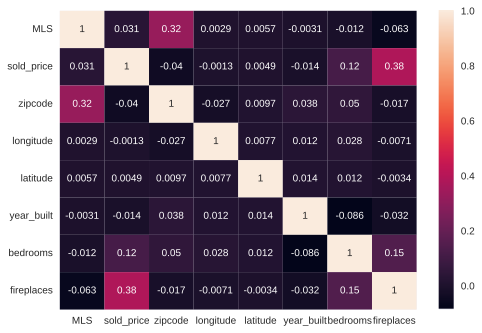

In [195]:
sns.heatmap(float_columns.corr(), annot=True);

* For this feature we can conclude that this feature is a key(id) because every values is unique
* We can drop this value, 
because the heatmap shows that there is only a slight correlation with the variable zip code

## Sold price

In [196]:
pd.DataFrame(data["sold_price"]).head(7)

,sold_price
0,5300000.0
1,4200000.0
2,4200000.0
3,4500000.0
4,3411450.0
5,3250000.0
6,2400000.0


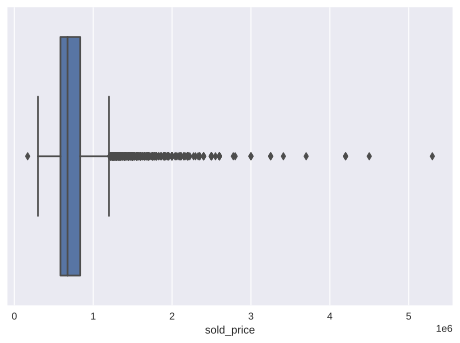

In [197]:
sns.boxplot(x="sold_price", data=data);

* There is <mark>no</mark> `null` or `NONE` values

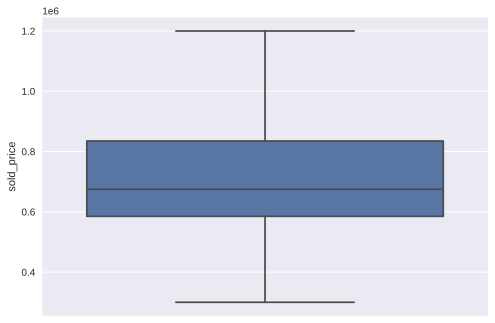

In [198]:
sns.boxplot(y="sold_price", data=data, showfliers = False);

### How many outliers are ?


In [199]:
Q1=data["sold_price"].describe().round(2)[4]
Q3=data["sold_price"].describe().round(2)[6]
IQ=Q3-Q1

In [200]:
low_out, high_out=Q1-(1.5*IQ),Q3+(1.5*IQ)

In [201]:
outliers = data[(data["sold_price"]<low_out) | (data["sold_price"]>high_out)]

In [202]:
outliers.shape[0]

395

In [203]:
outliers.sort_values(["sold_price"]).head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
141,21815257.0,169000.0,85648.0,-110918513.0,31451945.0,0.52,80.83,2018.0,4.0,3.0,1700.0,2.0,None,0.0,Ceramic Tile,None
162,21207587.0,1210520.0,85658.0,-111101588.0,32468488.0,0.33,1412.75,0.0,4.0,5.0,3334.0,2.0,"Dishwasher, Refrigerator, Microwave, Oven",3.0,"Carpet, Natural Stone, Wood",550.0
323,21211065.0,1212500.0,85658.0,-11105634.0,32454997.0,1.29,8282.0,2010.0,4.0,5.0,4600.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Carpet, Natural Stone, Wood",143.0
456,21701232.0,1215000.0,85718.0,-110947058.0,32340226.0,0.88,13579.6,2005.0,4.0,4.0,4881.0,3.0,"Desk, Dishwasher, Double Sink, Garbage Disposa...",4.0,"Carpet, Natural Stone",157.0
378,21220862.0,1215000.0,85750.0,-110849011.0,32322049.0,0.5,9465.0,1993.0,4.0,5.0,4448.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Natural Stone, Wood, Other",116.0


In [204]:

from numpy.lib.function_base import percentile
Q1=np.percentile(data["sold_price"],25)
Q3=np.percentile(data["sold_price"],75)
IQ=Q3-Q1


In [205]:
Q2=np.percentile(data["sold_price"],25)
Q2

585000.0

### Boxplot

In [206]:
import plotly.express as px
px.box(data, y="sold_price",points=False)

In [207]:
px.box(data, y="sold_price")

### Histograma

In [208]:
px.histogram(data,x="sold_price")

## Zip code

* Even though `zip code` is a `float type` variable, it should be treated as `categorical `because it has no `order` and incrementing or decrementing by one unit makes no sense

In [209]:
np.unique(data["zipcode"])

array([85118., 85192., 85541., 85601., 85602., 85603., 85605., 85609.,
       85610., 85611., 85614., 85615., 85619., 85621., 85622., 85623.,
       85624., 85625., 85629., 85630., 85637., 85638., 85640., 85641.,
       85643., 85645., 85646., 85648., 85658., 85701., 85704., 85705.,
       85710., 85711., 85712., 85713., 85715., 85716., 85718., 85719.,
       85730., 85737., 85739., 85742., 85743., 85745., 85747., 85748.,
       85749., 85750., 85755., 85901., 85929., 85935., 86024., 86323.])

In [210]:
data['zipcode'] = data['zipcode'].astype(float).astype(int).astype('string')

In [211]:
data["zipcode"]=data["zipcode"].astype("category")

In [212]:
dummies_zip=pd.get_dummies(data["zipcode"], prefix="Zip")
data=data.join(dummies_zip)


In [213]:
data=pd.get_dummies(data, columns=["zipcode"], prefix="Zip",drop_first=True)

## Loingitude and latitude


In [214]:
data[["longitude", "latitude"]].describe(percentiles=[0.25,0.5,0.75])

,longitude,latitude
count,5.000000e+03,5.000000e+03
mean,-1.000294e+08,2.941881e+07
std,3.129694e+07,8.752656e+06
min,-1.125202e+08,3.224300e+04
25%,-1.109714e+08,3.225282e+07
50%,-1.109108e+08,3.231316e+07
75%,-1.108314e+08,3.236620e+07
max,-1.109000e+02,3.492788e+07


* Outliers

In [215]:
find_outliers(data,"latitude").shape

(846, 126)

In [216]:
find_outliers(data,"longitude").shape

(588, 126)

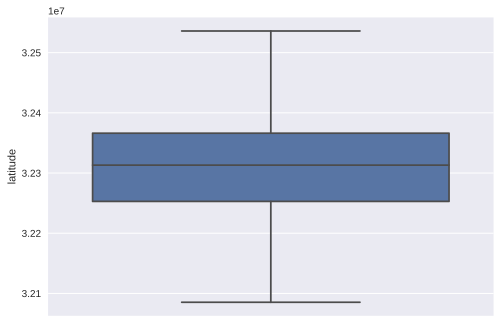

In [217]:
sns.boxplot( y="latitude", data=data, showfliers=False);

Although a large number of `outliers` can be observed for these two variables, they are known to have `no order`, so no `amputation` will be performed.

## year_built
### Building age
* Instead of using the year of construction `(year_built)`, the difference between the most recent date of construction (`2019`)and the year of construction of the house will be used.
* The new feature will have the name `building_age`

* This is because if the variable is taken as a reference, the `scale` would be too large to note the difference between the years of the home's age



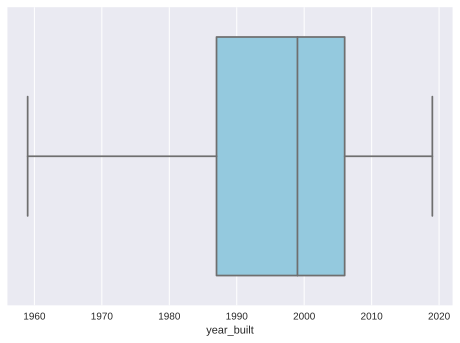

In [218]:
sns.boxplot(x="year_built", data=data, color = 'skyblue',showfliers = False );

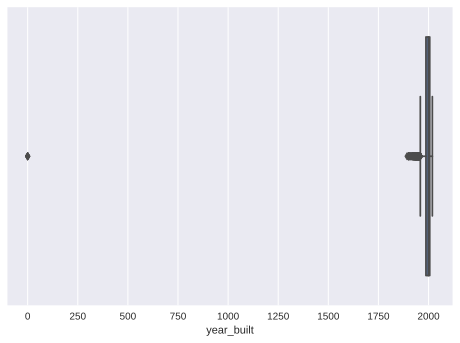

In [219]:
sns.boxplot(x="year_built", data=data);

* There are some records that are outliers(`see boxplot`), it could be that the `building age` have been recorded instead of the year it was built(`year_built`).

* It will be checked if only the `6` records that have `year_built=0` are all that exist and will be replaced first with the year `2019`

In [220]:
#Looking for outliers
data[data["year_built"]<1893]

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85747,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323
35,21307177.0,2495000.0,-110740635.0,31720431.0,131.0,1220.32,0.0,13.0,15.0,13000.0,...,0,0,0,0,0,0,0,0,0,0
162,21207587.0,1210520.0,-111101588.0,32468488.0,0.33,1412.75,0.0,4.0,5.0,3334.0,...,0,0,0,0,0,0,0,0,0,0
946,21608590.0,695000.0,-111183593.0,3170233.0,72.0,2480.58,0.0,4.0,4.0,2272.0,...,0,0,0,0,0,0,0,0,0,0
1438,21702126.0,877170.0,-110977158.0,32459429.0,0.6,2005.57,0.0,3.0,4.0,3078.0,...,0,0,0,0,1,0,0,0,0,0
1767,21719857.0,700000.0,-110963672.0,32216996.0,0.13,7059.56,0.0,3.0,3.0,2500.0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
#Looking for outliers
data[data["year_built"]<1900]

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85747,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323
35,21307177.0,2495000.0,-110740635.0,31720431.0,131.0,1220.32,0.0,13.0,15.0,13000.0,...,0,0,0,0,0,0,0,0,0,0
162,21207587.0,1210520.0,-111101588.0,32468488.0,0.33,1412.75,0.0,4.0,5.0,3334.0,...,0,0,0,0,0,0,0,0,0,0
946,21608590.0,695000.0,-111183593.0,3170233.0,72.0,2480.58,0.0,4.0,4.0,2272.0,...,0,0,0,0,0,0,0,0,0,0
1205,21522479.0,815000.0,-110972187.0,32215268.0,0.16,4599.0,1893.0,5.0,3.0,3466.0,...,0,0,0,0,0,0,0,0,0,0
1438,21702126.0,877170.0,-110977158.0,32459429.0,0.6,2005.57,0.0,3.0,4.0,3078.0,...,0,0,0,0,1,0,0,0,0,0
1767,21719857.0,700000.0,-110963672.0,32216996.0,0.13,7059.56,0.0,3.0,3.0,2500.0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
#@title

#@title˚
%%html magic ˚
<div style="background-color: #ddffdd;border-left: 6px solid #04AA6D ;width=4px; margin-bottom=22px;margin-bottom: 10px;
  padding: 5px 12px;">
  <h3>
  <strong style="color:green">Conclusion</strong> </h3>
  <li>It is concluded that the oldest house is from <strong>1893</strong> and although it is an outlier it is believed that these data point is <strong>true</strong>
  <li>  Finally, only the <strong>5</strong> values ​​that are <strong>zero</strong> will be replaced by the value <strong>2019</strong>
</div>

In [223]:
##Max date
max_building_age=max(data["year_built"])
# Replace 0's by 2019
data["year_built"]=np.where(data["year_built"]==0,2019,data["year_built"])
##New feature
data["build_age"]=max_building_age-data["year_built"]

In [224]:
data["build_age"].describe()

count    5000.000000
mean       24.653000
std        17.745534
min         0.000000
25%        13.000000
50%        20.000000
75%        32.000000
max       126.000000
Name: build_age, dtype: float64

In [225]:
data["year_built"].describe()

count    5000.000000
mean     1994.347000
std        17.745534
min      1893.000000
25%      1987.000000
50%      1999.000000
75%      2006.000000
max      2019.000000
Name: year_built, dtype: float64

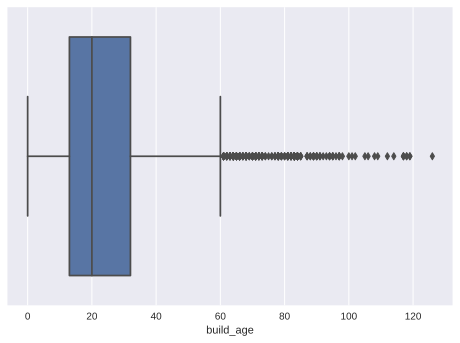

In [226]:
sns.boxplot(data=data, x="build_age");

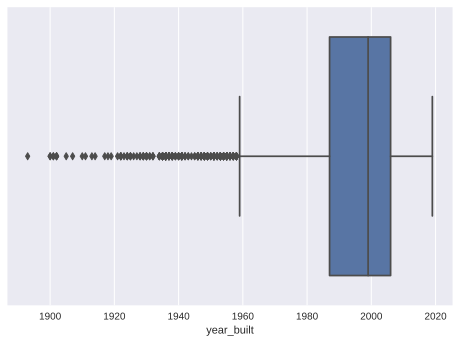

In [227]:
sns.boxplot(data=data, x="year_built");

In [228]:
#@title
%%html magic 
<div style="background-color: #ddffdd;border-left: 6px solid #04AA6D ;width=4px; margin-bottom=22px;margin-bottom: 10px;
  padding: 5px 12px;">
  <h3>
  <strong style="color:green">Conclusion</strong> </h3>
  <li>It can be seen that the distribution of the two boxplots are symmetric but the scale is <span style="color:green"><strong>better</strong></span> for future predictions.
</div>


## Bedrooms


In [229]:
data["bedrooms"].describe()

count    5000.000000
mean        3.933800
std         1.245362
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        36.000000
Name: bedrooms, dtype: float64

In [230]:
## Number of outliers
find_outliers(data,"bedrooms").shape[0]

173

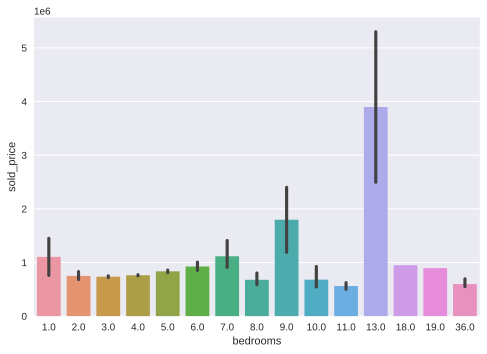

In [231]:
sns.barplot(y="sold_price",x="bedrooms",data=data);

In [232]:
df_bedrooms=data["bedrooms"].value_counts()

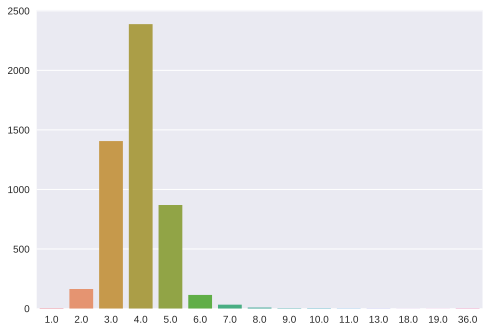

In [233]:
sns.barplot(df_bedrooms.index,df_bedrooms.values );

Podemos ver que hay una tendencia a la alza entre el numero de habitaciones y el precio de venta para valores entre 2 y 7. Por otro lados esta tendencia no se mantiene, para viviendas con numero de baños mayores a 7, sin embargo en el barplot de abajo podemos ver que hay muy pocos valores de viviendas con 8 baños o más por lo que se haraá un análisis amputando estos outliers(bedrooms>8)

In [234]:
find_outliers(data,"bedrooms")

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323,build_age
0,21530491.0,5300000.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,...,0,0,0,0,0,0,0,0,0,78.0
3,21919321.0,4500000.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,...,0,0,0,0,0,0,0,0,0,89.0
6,21610478.0,2400000.0,-110883315.0,32261069.0,2022-01-02 00:00:00,19038.42,2001.0,9.0,8.0,12025.0,...,0,0,0,0,0,0,0,0,0,18.0
7,21211741.0,2500000.0,-110861002.0,32331603.0,2022-07-01 00:00:00,21646.0,2011.0,6.0,8.0,8921.0,...,0,0,1,0,0,0,0,0,0,8.0
12,21217839.0,2100000.0,-110736202.0,31721347.0,2022-06-29 00:00:00,11723.0,1995.0,6.0,7.0,6454.0,...,0,0,0,0,0,0,0,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,21808412.0,545000.0,-110739628.0,32266742.0,0.95,5297.88,1992.0,6.0,4.0,3258.0,...,0,1,0,0,0,0,0,0,0,27.0
4745,21405366.0,560000.0,-110780413.0,32248935.0,2.59,6614.0,1982.0,6.0,5.0,4810.0,...,0,1,0,0,0,0,0,0,0,37.0
4809,21817881.0,543500.0,-11096448.0,32281713.0,0.25,2447.24,1980.0,10.0,5.0,4000.0,...,0,0,0,0,0,0,0,0,0,39.0
4810,21829943.0,559000.0,-110925026.0,3223312.0,0.17,4319.33,1993.0,6.0,4.0,3047.0,...,0,0,0,0,0,0,0,0,0,26.0


In [235]:
outliers_bedrooms=np.unique(find_outliers(data, "bedrooms")["bedrooms"].values)

In [236]:
data_no_outlieres_bedrooms=data[~data["bedrooms"].isin(outliers_bedrooms)][["bedrooms","sold_price"]]

In [237]:
data_no_outlieres_bedrooms.corr()

,bedrooms,sold_price
bedrooms,1.000000,0.098943
sold_price,0.098943,1.000000


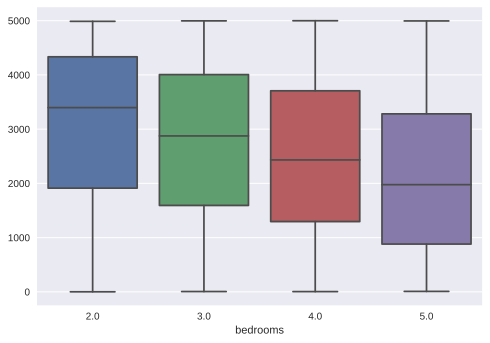

In [238]:
sns.boxplot(data=data_no_outlieres_bedrooms, x="bedrooms", y=data_no_outlieres_bedrooms.index)

In [239]:
data.iloc[:,0:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   float64
 1   sold_price        5000 non-null   float64
 2   longitude         5000 non-null   float64
 3   latitude          5000 non-null   float64
 4   lot_acres         4990 non-null   object 
 5   taxes             5000 non-null   object 
 6   year_built        5000 non-null   float64
 7   bedrooms          5000 non-null   float64
 8   bathrooms         5000 non-null   object 
 9   sqrt_ft           5000 non-null   object 
 10  garage            5000 non-null   object 
 11  kitchen_features  5000 non-null   object 
 12  fireplaces        4975 non-null   float64
 13  floor_covering    5000 non-null   object 
 14  HOA               5000 non-null   object 
dtypes: float64(7), object(8)
memory usage: 586.1+ KB


#Analysis for features with `type=object` 

#### Function that counts how many types of data we have in a specific column

In [240]:
def count_types(column):
  float_type=0
  string_type=0
  date_type=0
  #df={"Feature":[],"float_type":[],"date_type":[],"string_type":[],"Total":[]}
  for value in data[column]:
    if type(value)==float:
      float_type=float_type+1
    elif type(value)==str:
      string_type=string_type+1
    else: 
      date_type=date_type+1
  return(print("Column: ",column,", float_type: ",float_type, ", date_type: ",date_type,", string_type: ",string_type,", Total: ",float_type+string_type+date_type))


In [241]:
def count_types(data,column):
  float_type=0
  string_type=0
  date_type=0
  #df={"Feature":[],"float_type":[],"date_type":[],"string_type":[],"Total":[]}
  for value in data[column]:
    if type(value)==float:
      float_type=float_type+1
    elif type(value)==str:
      string_type=string_type+1
    else: 
      date_type=date_type+1
  return(print("Column: ",column,", float_type: ",float_type, ", date_type: ",date_type,", string_type: ",string_type,", Total: ",float_type+string_type+date_type))


In [380]:
for i in data.columns:
  print(count_types(data, i))

Column:  MLS , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  sold_price , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  longitude , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  latitude , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  lot_acres , float_type:  294 , date_type:  796 , string_type:  3910 , Total:  5000
None
Column:  taxes , float_type:  1382 , date_type:  638 , string_type:  2980 , Total:  5000
None
Column:  year_built , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  bedrooms , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000
None
Column:  bathrooms , float_type:  4983 , date_type:  11 , string_type:  6 , Total:  5000
None
Column:  sqrt_ft , float_type:  4943 , date_type:  1 , string_type:  56 , Total:  5000
None
Column:  garage , float_type:  4925 , date_type:  68 , string_type:  7 

In [243]:
#@title
#@title˚
%%html magic
<div style="background-color: #ffdddd;border-left: 6px solid #f44336 ; margin-bottom=22:pxmargin-bottom: 15px;
  padding: 4px 12px;">
  <strong style="color:#f44336">Warning</strong> <p>
  This variables have <span style="color:red">three </span> different types <span style="color:red"><strong>lot_acress, taxes, year_built, bathrooms, sqrt_ft, garage, HOA</strong></span></p>
</div>

In [244]:
data[["lot_acres","taxes","year_built","bathrooms","sqrt_ft","garage","HOA"]]

,lot_acres,taxes,year_built,bathrooms,sqrt_ft,garage,HOA
0,2154.0,5272.0,1941.0,10.0,10500.0,0.0,0.0
1,1707.0,10422.36,1997.0,2.0,7300.0,0.0,0.0
2,1707.0,10482.0,1997.0,3.0,None,None,None
3,636.67,8418.58,1930.0,5.0,9019.0,4.0,None
4,3.21,15393.0,1995.0,6.0,6396.0,3.0,55.0
...,...,...,...,...,...,...,...
4995,4.98,2017.0,2005.0,3.0,3601.0,3.0,None
4996,1.42,4822-01-01 00:00:00,1990.0,3.0,2318.0,3.0,43.0
4997,2022-06-12 00:00:00,1000.0,1969.0,2.0,1772.0,0.0,None
4998,2022-01-01 00:00:00,5822.93,2009.0,4.0,3724.0,3.0,None


## lot_acres

In [385]:
df=data._convert(numeric=True)

In [415]:
df["lot_acres"].describe()

count    4194.000000
mean        5.107530
std        56.353792
min         0.000000
25%         0.500000
50%         0.870000
75%         1.570000
max      2154.000000
Name: lot_acres, dtype: float64

In [404]:
median_lot_acres=df["lot_acres"].describe()["50%"]

In [401]:
mean_lot_acres=df["lot_acres"].describe()["mean"]

In [405]:
median_lot_acres, mean_lot_acres

(0.87, 5.10752980448259)

In [245]:
count_types(data,"lot_acres")

Column:  lot_acres , float_type:  294 , date_type:  796 , string_type:  3910 , Total:  5000


In [407]:
#Changing None and datetime values with 0
data["lot_acres"]=np.where(~data["lot_acres"].isin([x for x in data["lot_acres"] if isinstance(x, float)]),median_lot_acres, data["lot_acres"] ).astype(float)

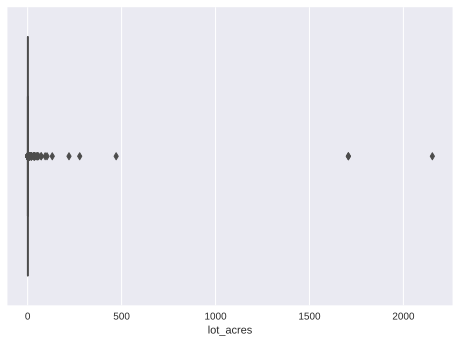

In [411]:
sns.boxplot(x="lot_acres",data=data);

In [414]:
data.lot_acres.describe()

count    4990.000000
mean        2.519283
std        46.677303
min         0.000000
25%         0.870000
50%         0.870000
75%         0.870000
max      2154.000000
Name: lot_acres, dtype: float64

In [413]:
find_outliers(data, "lot_acres").shape

(284, 127)

## taxes


In [386]:
mean_taxes=df["taxes"].describe()["mean"]

In [387]:
count_types(data, "taxes")

Column:  taxes , float_type:  5000 , date_type:  0 , string_type:  0 , Total:  5000


In [388]:
#Changing None and datetime values with 0
data["taxes"]=np.where(~data["taxes"].isin([x for x in data["taxes"] if isinstance(x, float)]),mean_taxes, data["taxes"] ).astype(float)

In [391]:
find_outliers(data, "taxes").shape[0]

756

* There are `756` outliers

In [396]:
find_outliers(data, "taxes")

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323,build_age
0,21530491.0,5300000.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,...,0,0,0,0,0,0,0,0,0,78.0
7,21211741.0,2500000.0,-110861002.0,32331603.0,2022-07-01 00:00:00,21646.0,2011.0,6.0,8.0,8921.0,...,0,0,1,0,0,0,0,0,0,8.0
11,21131956.0,2050000.0,-110918294.0,32341609.0,1.65,24353.0,2009.0,5.0,6.0,7230.0,...,0,0,0,0,0,0,0,0,0,10.0
14,21534099.0,3000000.0,-110883068.0,32508778.0,0.0,29669.0,2008.0,3.0,3.0,3095.0,...,0,0,0,0,0,0,0,0,0,11.0
19,21400806.0,2800000.0,-110837572.0,32328412.0,93.0,22320.0,1983.0,4.0,5.0,6050.0,...,0,0,1,0,0,0,0,0,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,21802464.0,550000.0,-11085074.0,32305911.0,0.22,4153.0,1986.0,3.0,2.0,2468.0,...,0,0,1,0,0,0,0,0,0,33.0
4983,21902362.0,525000.0,-110781531.0,32289059.0,0.72,5022.0,1999.0,4.0,3.0,3056.0,...,0,1,0,0,0,0,0,0,0,20.0
4994,21909379.0,535000.0,-110922291.0,32317496.0,0.18,4414.0,2002.0,3.0,2.0,2106.0,...,0,0,0,0,0,0,0,0,0,17.0
4995,21810382.0,495000.0,-110661829.0,31907917.0,4.98,2017.0,2005.0,5.0,3.0,3601.0,...,0,0,0,0,0,0,0,0,0,14.0


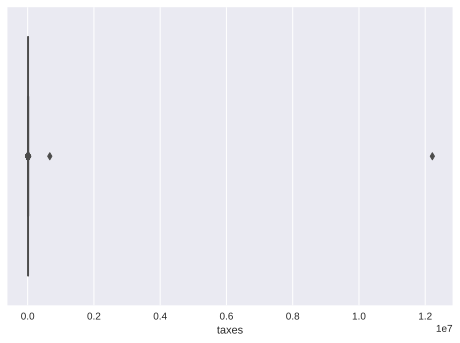

In [393]:
sns.boxplot(x="taxes", data=data);

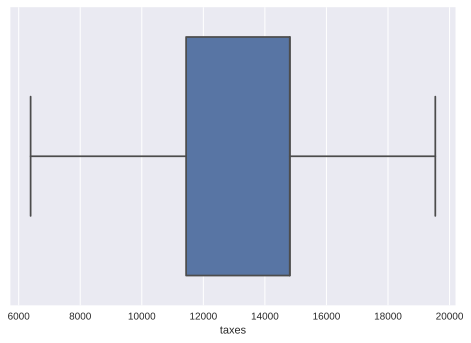

In [394]:
sns.boxplot(x="taxes", data=data, showfliers=False);

In [368]:
#@title
%%html magic 
<div style="background-color: #e7f3fe;border-left: 6px solid #2196F3 ;width=4px; margin-bottom=22px;margin-bottom: 10px;
  padding: 5px 12px;">
  <h3>
  <strong style="color:blue">Info</strong> </h3>
  <li>After drop the values that with <strong>type=datetime.datetime</strong> there are <span style="color:blue">4362</span> records.
  <li> After convert the string values to float values and compute linear correlation, we can see that the linear correlation <span style="color:blue">is not significant</span> for some other numerical variable.
  <li> So we can <span style="color:blue">drop</span> this variable or <span style="color:blue">impute</span> the values ​​with data type equal to <span style="color:blue">datetime.datetime to the mean</span>
</div>

## bathrooms




In [359]:
count_types(data,"bathrooms")

Column:  bathrooms , float_type:  4983 , date_type:  11 , string_type:  6 , Total:  5000


* We only have `17` data that is not of `float type`. So we can review these cases in detail and make a decision


In [256]:
data[~data["bathrooms"].isin([x for x in data["bathrooms"] if isinstance(x,float)])]["bathrooms"]

39      2022-05-04 00:00:00
1471    2022-05-03 00:00:00
1665    2022-05-03 00:00:00
1666    2022-05-03 00:00:00
2025                   None
2450    2022-05-03 00:00:00
2567    2022-05-02 00:00:00
2766                   None
3108                   None
3301    2022-05-03 00:00:00
3529                   None
3822                   None
3992    2022-05-03 00:00:00
4129    2022-05-02 00:00:00
4726    2022-05-02 00:00:00
4802    2022-05-03 00:00:00
4812                   None
Name: bathrooms, dtype: object

In [257]:
data[data["bathrooms"]==0]

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323,build_age


* We can see that there are no register with `bathrooms==0`.
* We can replace the `None` values ​​with zero and the `datatime.datatime` values ​​with the mean 
* Since there are so few values, we might as well `delete` them.


In [258]:
data2=data[data["bathrooms"].isin([x for x in data["bathrooms"] if isinstance(x,float)])]

In [259]:
data2["bathrooms"]=data2["bathrooms"].astype(float)

### Outliers


In [260]:
#data2.drop(["bathrrooms"],axis=1)

In [261]:
find_outliers(data2,"bathrooms").shape

(305, 127)

### Boxplot


#### With outliers

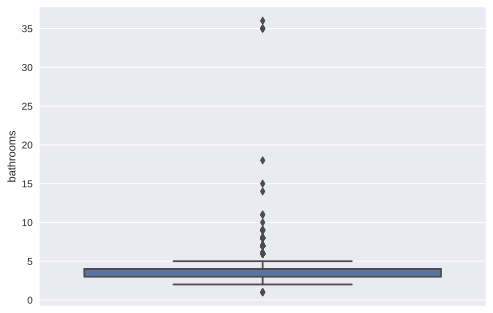

In [262]:
sns.boxplot(data=data2, y="bathrooms");

#### With no outliers

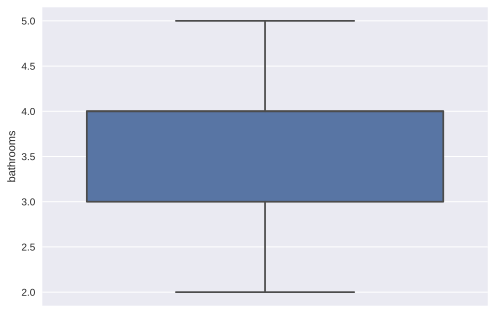

In [263]:
sns.boxplot(data=data2, y="bathrooms", showfliers = False);

### Barplots

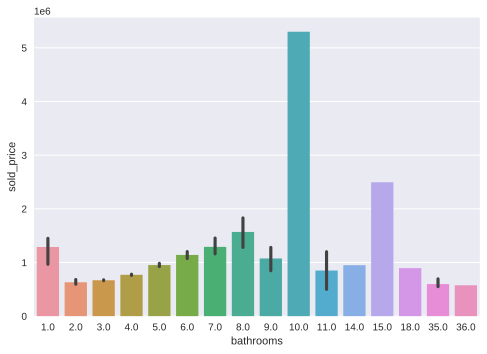

In [264]:
sns.barplot(y="sold_price",x="bathrooms",data=data2);

In [265]:
df_bathrooms=data2["bathrooms"].value_counts()

In [266]:
data2[["sold_price","bathrooms"]].corr()

,sold_price,bathrooms
sold_price,1.000000,0.326658
bathrooms,0.326658,1.000000


In [267]:
outliers_bathroom=np.unique(find_outliers(data2, "bathrooms")["bathrooms"].values)
outliers_bathroom

array([ 1.,  6.,  7.,  8.,  9., 10., 11., 14., 15., 18., 35., 36.])

In [268]:
# Linear correlation with no outliers
data2[~data2["bathrooms"].isin(outliers_bathroom)][["bathrooms","sold_price"]].corr()

,bathrooms,sold_price
bathrooms,1.000000,0.343119
sold_price,0.343119,1.000000


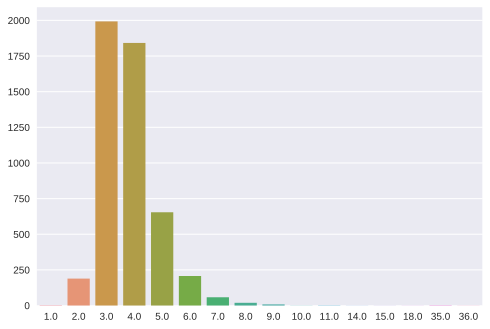

In [269]:
sns.barplot(df_bathrooms.index,df_bathrooms.values );

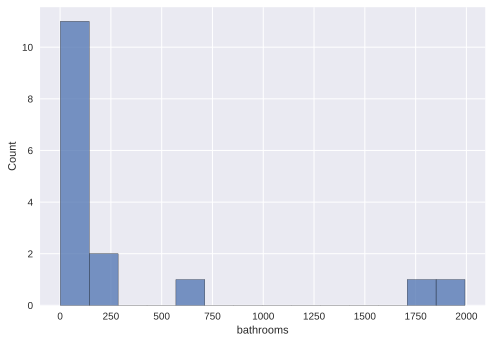

In [270]:
sns.histplot(df_bathrooms)

## sqrt_ft

In [271]:
count_types(data2,"sqrt_ft")

Column:  sqrt_ft , float_type:  4932 , date_type:  1 , string_type:  50 , Total:  4983


* There are `51` non `float` values

In [272]:
count_types(data,"lot_acres")

Column:  lot_acres , float_type:  294 , date_type:  796 , string_type:  3910 , Total:  5000


In [273]:
data2[~data2["sqrt_ft"].isin(x for x in data2["sqrt_ft"] if isinstance(x,float))]["sqrt_ft"].values

array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', datetime.datetime(2502, 6, 1, 0, 0), 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None'],
      dtype=object)

In [274]:
min(df["sqrt_ft"])

6396.0

* 50 values are "None" and 1 values is `datetime`
* We can see that there are non zero values and the  min value is `6396`. So in this case it could not be `intuited` that the value `None` 
represents the value `0`.
* We will replace "None" and "datetime" values by the mean


In [275]:
mean_sqrt_ft=data2._convert(numeric=True)["sqrt_ft"].describe()["mean"]

In [276]:
#Replace NONE and datetime values
data2["sqrt_ft"]=np.where(~data2["sqrt_ft"].isin([x for x in data2["sqrt_ft"] if isinstance(x, float)]),mean_sqrt_ft, data2["sqrt_ft"] ).astype(float)

In [277]:
find_outliers(data2, "sqrt_ft").shape

(238, 127)

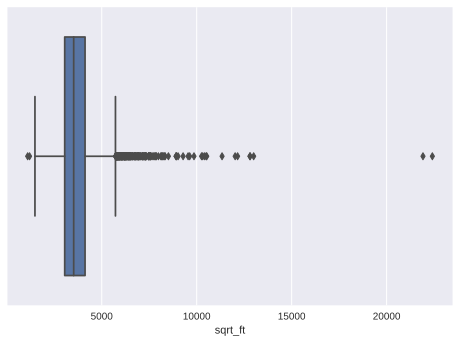

In [278]:
sns.boxplot(data=data2, x="sqrt_ft")

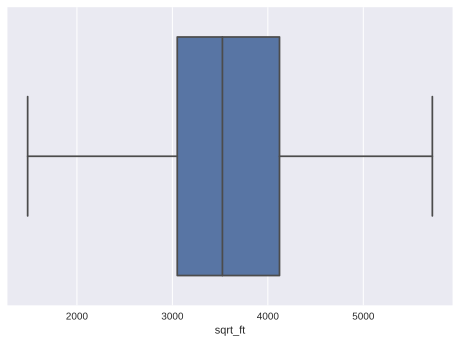

In [279]:
sns.boxplot(data=data2, x="sqrt_ft", showfliers=False )

In [280]:
data2[["sold_price", "sqrt_ft"]].corr()

,sold_price,sqrt_ft
sold_price,1.00000,0.52428
sqrt_ft,0.52428,1.00000


In [281]:
df[["sold_price","sqrt_ft"]].corr()

,sold_price,sqrt_ft
sold_price,1.00000,-0.04925
sqrt_ft,-0.04925,1.00000


* With the imputations the correlation changed significantly


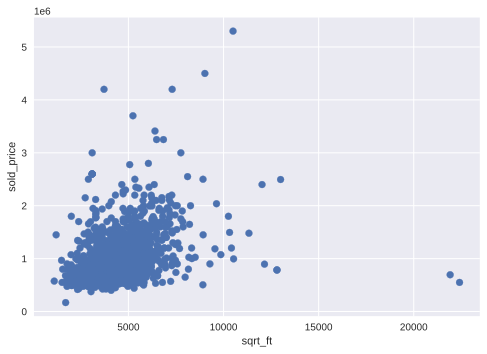

In [282]:
plt.scatter(x=data2["sqrt_ft"], y=data2["sold_price"])
plt.xlabel("sqrt_ft")
plt.ylabel("sold_price") ;

## Garage

In [283]:
count_types(data2, "garage")

Column:  garage , float_type:  4908 , date_type:  68 , string_type:  7 , Total:  4983


In [284]:
data2[~data2["garage"].isin(x for x in data2["garage"] if isinstance(x,float))]["garage"].values

array(['None', 'None', datetime.datetime(2022, 5, 4, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0), 'None',
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 4, 0, 0),
       datetime.datetime(2022, 5, 4, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 3, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       datetime.datetime(2022, 5, 2, 0, 0),
       d

In [285]:
data2[~data2["garage"].isin([x for x in data2["garage"] if isinstance(x,float)])].iloc[:,1:15]

,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
2,4200000.0,-111040707.0,31594844.0,1707.0,10482.0,1997.0,2.0,3.0,3716.881995,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
263,1200000.0,-111040612.0,31594683.0,91.7,8473.86,1925.0,6.0,5.0,6884.000000,None,"Dishwasher, Double Sink, Island, Prep Sink, Re...",7.0,"Carpet, Concrete",None
327,1335000.0,-110852876.0,32256085.0,1.13,10037.18,1985.0,5.0,5.0,5886.000000,2022-05-04 00:00:00,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Natural Stone, Wood, Other",48.0
425,1000000.0,-111027855.0,32356862.0,2022-03-01 00:00:00,10121.43,1973.0,5.0,6.0,6097.000000,2022-05-03 00:00:00,"Dishwasher, Refrigerator, Microwave, Oven",1.0,"Carpet, Ceramic Tile, Natural Stone",53.0
455,1150000.0,-111077999.0,32465221.0,1.44,3001-08-01 00:00:00,2018.0,4.0,5.0,3334.000000,2022-05-03 00:00:00,"Compactor, Desk, Dishwasher, Garbage Disposal,...",3.0,Natural Stone,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,540000.0,-110939364.0,32454438.0,0.17,3864.75,1995.0,3.0,3.0,2665.000000,2022-05-02 00:00:00,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",135.0
4939,525000.0,-110895274.0,32515669.0,0.23,3275-03-01 00:00:00,2008.0,3.0,4.0,2468.000000,2022-05-02 00:00:00,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,Ceramic Tile,165.0
4970,515000.0,-110868705.0,32532536.0,0.26,3847.38,1994.0,3.0,3.0,3330.000000,2022-05-02 00:00:00,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2.0,"Carpet, Ceramic Tile, Wood",199.0
4980,550000.0,-110946054.0,32467011.0,0.2,3138.36,1987.0,2.0,2.0,2250.000000,2022-05-02 00:00:00,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0.0,Ceramic Tile,149.0


In [286]:
x=pd.DataFrame()

In [287]:
data3=data2[data2["garage"].isin([x for x in data2["garage"] if isinstance(x,float)])]

In [288]:
data3["garage"]=data3["garage"].astype(float)

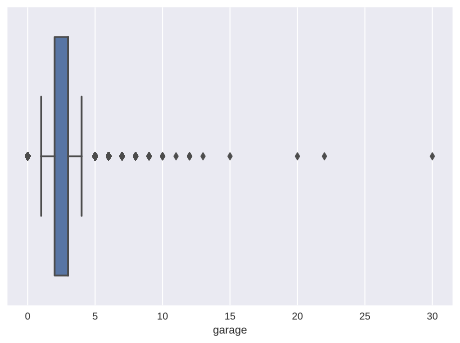

In [289]:
sns.boxplot(x="garage", data=data3);

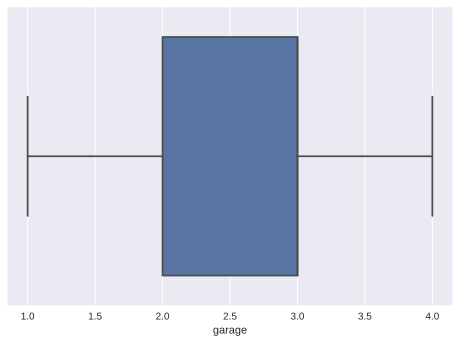

In [290]:
sns.boxplot(x="garage", data=data3, showfliers=False );

In [291]:
find_outliers(data3,"garage").shape[0]

377

In [292]:
data3[["sold_price","garage"]].corr()

,sold_price,garage
sold_price,1.000000,0.097635
garage,0.097635,1.000000


In [293]:
df[["sold_price","garage"]].corr()

,sold_price,garage
sold_price,1.000000,-0.700938
garage,-0.700938,1.000000


## kitchen_features

In [294]:
count_types(data3, "kitchen_features")

Column:  kitchen_features , float_type:  0 , date_type:  0 , string_type:  4908 , Total:  4908


* Looking for all distinct values

In [295]:
y=[]
for i in data3["kitchen_features"]:
  for j in i.split(","):
    y.append(j)

In [296]:
len(np.unique(y))

702

In [297]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [298]:
kitchen_features = {}
for i in data3["kitchen_features"]:
    for j in j:
        if j not in kitchen_features:
            kitchen_features[j] = 1
        else:
            kitchen_features[j] += 1


In [299]:
x={"kitchen_feature":[],"Count":[]}
for i in np.unique(y):
  x["kitchen_feature"].append(i)
  x["Count"].append(y.count(i))

In [300]:
kitchen_feature=pd.DataFrame(x).sort_values(["Count"],ascending=False)

In [301]:
kitchen_feature.head(5)

,kitchen_feature,Count
177,Garbage Disposal,4403
669,Refrigerator,4132
686,Dishwasher,4076
403,Oven,2850
183,Microwave,2556


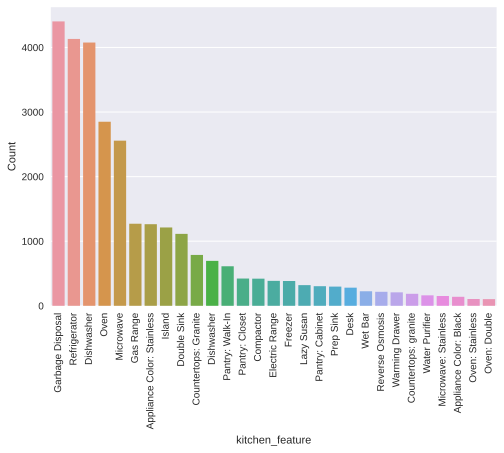

In [302]:
sns.barplot(x="kitchen_feature",y="Count", data=kitchen_feature[kitchen_feature["Count"]>100])
plt.xticks(rotation=90);




* We just look for the values that at least appear `500` times(10% total data)
* We get `12`values

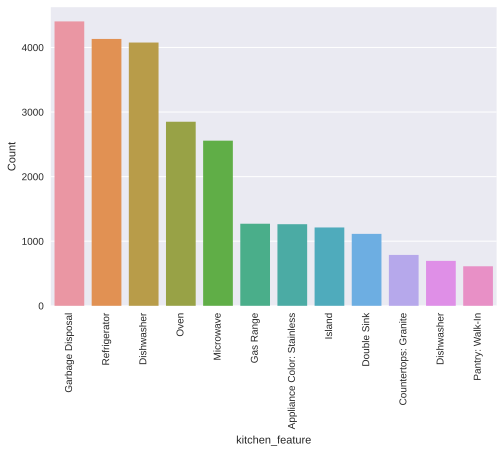

In [303]:
sns.barplot(x="kitchen_feature",y="Count", data=kitchen_feature[kitchen_feature["Count"]>500])
plt.xticks(rotation=90);

In [304]:
tweleve_best_kitchen_features=kitchen_feature[kitchen_feature["Count"]>500]

In [305]:
dummie=pd.DataFrame()
dummie["dummie"]=data3["kitchen_features"].str.split(',')

In [306]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [307]:
#dummies_kitchen = boolean_df(dummie["dummie"], tweleve_best_kitchen_features.kitchen_feature.unique())

In [308]:
dummies_kitchen=boolean_df(data3["kitchen_features"], tweleve_best_kitchen_features.kitchen_feature.unique())

In [309]:
data3=data3.join(dummies_kitchen)

In [310]:
data3.head(5)

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Dishwasher,Oven,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Dishwasher,Pantry: Walk-In
0,21530491.0,5300000.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,...,True,True,False,False,False,False,False,False,False,False
1,21529082.0,4200000.0,-111045371.0,31594213.0,1707.0,10422.36,1997.0,2.0,2.0,7300.0,...,True,False,False,False,False,False,False,False,False,False
3,21919321.0,4500000.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,...,True,False,False,False,False,False,True,False,False,False
4,21306357.0,3411450.0,-110813768.0,32285162.0,3.21,15393.0,1995.0,4.0,6.0,6396.0,...,True,True,True,False,False,False,False,False,False,False
5,21528016.0,3250000.0,-110910593.0,3233909.0,1.67,27802.84,1999.0,3.0,4.0,6842.0,...,True,True,True,False,False,False,False,False,False,False


## floor_covering


In [311]:
count_types(data3, "floor_covering")

Column:  floor_covering , float_type:  0 , date_type:  0 , string_type:  4908 , Total:  4908


* Looking for all distinct values

In [312]:
data3[["floor_covering","kitchen_features"]]

,floor_covering,kitchen_features
0,"Mexican Tile, Wood","Dishwasher, Freezer, Refrigerator, Oven"
1,"Natural Stone, Other","Dishwasher, Garbage Disposal"
3,"Ceramic Tile, Laminate, Wood","Dishwasher, Double Sink, Pantry: Butler, Refri..."
4,"Carpet, Concrete","Dishwasher, Garbage Disposal, Refrigerator, Mi..."
5,"Natural Stone, Wood, Other","Dishwasher, Garbage Disposal, Refrigerator, Mi..."
...,...,...
4994,Ceramic Tile,"Dishwasher, Double Sink, Electric Range, Garba..."
4995,"Carpet, Ceramic Tile","Dishwasher, Double Sink, Garbage Disposal, Gas..."
4996,"Carpet, Ceramic Tile","Dishwasher, Double Sink, Electric Range, Garba..."
4997,Ceramic Tile,"Dishwasher, Electric Range, Island, Refrigerat..."


In [313]:
data3

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Dishwasher,Oven,Microwave,Gas Range,Appliance Color: Stainless,Island,Double Sink,Countertops: Granite,Dishwasher,Pantry: Walk-In
0,21530491.0,5300000.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,...,True,True,False,False,False,False,False,False,False,False
1,21529082.0,4200000.0,-111045371.0,31594213.0,1707.0,10422.36,1997.0,2.0,2.0,7300.0,...,True,False,False,False,False,False,False,False,False,False
3,21919321.0,4500000.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,...,True,False,False,False,False,False,True,False,False,False
4,21306357.0,3411450.0,-110813768.0,32285162.0,3.21,15393.0,1995.0,4.0,6.0,6396.0,...,True,True,True,False,False,False,False,False,False,False
5,21528016.0,3250000.0,-110910593.0,3233909.0,1.67,27802.84,1999.0,3.0,4.0,6842.0,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,21909379.0,535000.0,-110922291.0,32317496.0,0.18,4414.0,2002.0,3.0,2.0,2106.0,...,True,True,True,False,False,False,True,False,False,False
4995,21810382.0,495000.0,-110661829.0,31907917.0,4.98,2017.0,2005.0,5.0,3.0,3601.0,...,True,False,False,True,True,True,True,True,False,False
4996,21908591.0,550000.0,-110858556.0,32316373.0,1.42,4822-01-01 00:00:00,1990.0,4.0,3.0,2318.0,...,True,False,True,False,True,False,True,False,False,False
4997,21832452.0,475000.0,-110755428.0,32964708.0,2022-06-12 00:00:00,1000.0,1969.0,3.0,2.0,1772.0,...,True,False,False,False,True,True,False,False,False,False


In [314]:
y=[]
for i in data3["floor_covering"]:
  for j in i.split(","):
    y.append(j)

In [315]:
len(np.unique(y))

134

In [316]:
floor_covering = {}
for i in data3["floor_covering"]:
    for j in j:
        if j not in kitchen_features:
            kitchen_features[j] = 1
        else:
            kitchen_features[j] += 1


In [317]:
x={"floor_coverting":[],"Count":[]}
for i in np.unique(y):
  x["floor_coverting"].append(i)
  x["Count"].append(y.count(i))

In [318]:
floor_coverting=pd.DataFrame(x).sort_values(["Count"],ascending=False)

In [319]:
floor_coverting.head(5)

,floor_coverting,Count
105,Carpet,3455
0,Ceramic Tile,1928
6,Natural Stone,1218
104,Wood,1171
106,Ceramic Tile,557


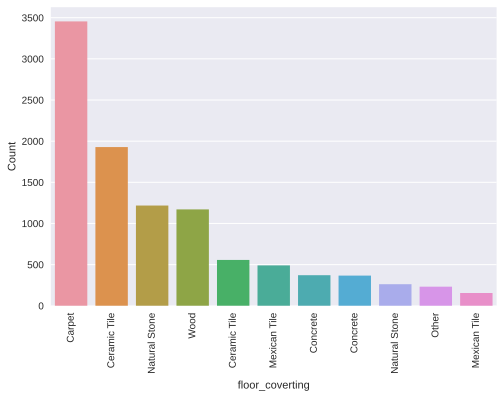

In [320]:
sns.barplot(x="floor_coverting",y="Count", data=floor_coverting[floor_coverting["Count"]>100])
plt.xticks(rotation=90);




* We just look for the values that at least appear `500` times(10% total data)
* We get `12`values

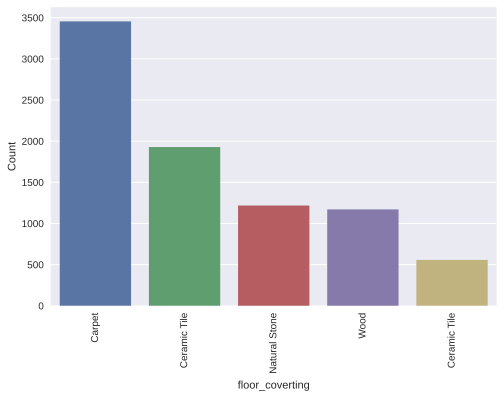

In [321]:
sns.barplot(x="floor_coverting",y="Count", data=floor_coverting[floor_coverting["Count"]>500])
plt.xticks(rotation=90);

In [322]:
five_best_floor_coverting_feature=floor_coverting[floor_coverting["Count"]>500]

In [323]:
five_best_floor_coverting_feature

,floor_coverting,Count
105,Carpet,3455
0,Ceramic Tile,1928
6,Natural Stone,1218
104,Wood,1171
106,Ceramic Tile,557


In [324]:
five_best_floor_coverting_feature.floor_coverting.unique()

array(['Carpet', ' Ceramic Tile', ' Natural Stone', ' Wood',
       'Ceramic Tile'], dtype=object)

In [325]:
dummies_floor_coverting=boolean_df(data3["floor_covering"], five_best_floor_coverting_feature.floor_coverting.unique())

In [326]:
data3=data3.join(dummies_floor_coverting)

In [327]:
data3.head(5)

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Island,Double Sink,Countertops: Granite,Dishwasher,Pantry: Walk-In,Carpet,Ceramic Tile,Natural Stone,Wood,Ceramic Tile
0,21530491.0,5300000.0,-1103782.0,31356362.0,2154.0,5272.0,1941.0,13.0,10.0,10500.0,...,False,False,False,False,False,False,False,False,True,False
1,21529082.0,4200000.0,-111045371.0,31594213.0,1707.0,10422.36,1997.0,2.0,2.0,7300.0,...,False,False,False,False,False,False,False,False,False,False
3,21919321.0,4500000.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,...,False,True,False,False,False,False,False,False,True,True
4,21306357.0,3411450.0,-110813768.0,32285162.0,3.21,15393.0,1995.0,4.0,6.0,6396.0,...,False,False,False,False,False,True,False,False,False,False
5,21528016.0,3250000.0,-110910593.0,3233909.0,1.67,27802.84,1999.0,3.0,4.0,6842.0,...,False,False,False,False,False,False,False,False,True,False


## HOA

In [330]:
count_types(data3,"HOA")

Column:  HOA , float_type:  4200 , date_type:  5 , string_type:  703 , Total:  4908


* We can see that this feature only has 6 values with `date_type=datatime.datatime`
* 


In [331]:
data3[data3["HOA"]=="None"].shape[0]

533

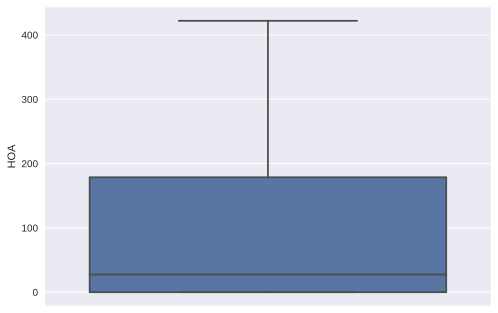

In [332]:
sns.boxplot(data=df, y="HOA");

In [333]:
#Filter HOA feature by datetype string
HOA=[x for x in data["HOA"] if isinstance(x, str)]

In [334]:
#Create new df (HOA_df) just with string values
HOA_df=data[data['HOA'].isin(HOA)]

In [335]:
HOA_df.head(5)

,MLS,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,Zip_85748,Zip_85749,Zip_85750,Zip_85755,Zip_85901,Zip_85929,Zip_85935,Zip_86024,Zip_86323,build_age
2,3054672.0,4200000.0,-111040707.0,31594844.0,1707.0,10482.0,1997.0,2.0,3.0,None,...,0,0,0,0,0,0,0,0,0,22.0
3,21919321.0,4500000.0,-111035925.0,31645878.0,636.67,8418.58,1930.0,7.0,5.0,9019.0,...,0,0,0,0,0,0,0,0,0,89.0
9,21812010.0,3250000.0,-11083795.0,32327575.0,3.53,18936.11,2007.0,5.0,6.0,6480.0,...,0,0,1,0,0,0,0,0,0,12.0
10,21900396.0,2776518.0,-111045441.0,31562121.0,147.18,7330.36,1935.0,5.0,5.0,5067.0,...,0,0,0,0,0,0,0,0,0,84.0
39,4113243.0,2200000.0,-11104463.0,31562185.0,147.18,3902.44,1935.0,5.0,2022-05-04 00:00:00,4963.0,...,0,0,0,0,0,0,0,0,0,84.0


* We can see that there are a lot of `None` values 
* 

In [336]:
HOA_df[HOA_df["HOA"]!="None"]["HOA"].values

array(['141.67', '157.33', '83.33', '177.34', '212.88', '57.33', '141.67',
       '212.88', '4.16', '49.43', '63.98', '258.08', '145.83', '157.33',
       '37.5', '119.66', '212.88', '212.88', '157.33', '54.16', '213.88',
       '83.33', '157.33', '4.16', '141.66', '193.5', '43.75', '258.08',
       '36.02', '212.88', '212.88', '332.66', '43.01', '332.67', '69.16',
       '33.33', '16.67', '58.33', '40.55', '43.71', '40.55', '166.66',
       '8.33', '119.66', '66.67', '4.16', '225.21', '66.67', '225.21',
       '50.42', '57.33', '73.72', '149.5', '188.33', '73.33', '4.17',
       '40.77', '258.08', '194.51', '6.25', '55.58', '53.34', '66.67',
       '275.08', '123.44', '4.16', '16.66', '194.51', '97.66', '39.59',
       '58.36', '40.78', '62.5', '4.16', '8.33', '16.67', '41.08',
       '15.41', '43.75', '6.25', '4.16', '225.21', '62.5', '87.66',
       '42.38', '233.33', '83.34', '16.66', '83.33', '58.33', '43.75',
       '68.66', '15.45', '15.45', '5.25', '88.33', '83.33', '4.17',
   

* We can see that the strings are just numerics values parsed to string

In [337]:
df["HOA"].describe()

count      6.000000
mean     116.166667
std      172.360572
min        0.000000
25%        0.000000
50%       27.500000
75%      178.750000
max      422.000000
Name: HOA, dtype: float64

In [338]:
HOA_float=[x for x in data3["HOA"] if isinstance(x, float)]

In [339]:
HOA_float_df=data3[data3['HOA'].isin(HOA_float)]["HOA"].astype(float)

In [340]:
HOA_float_df.describe().round(2)

count    4200.00
mean       82.07
std        92.41
min         0.00
25%         6.00
50%        55.00
75%       133.00
max       925.00
Name: HOA, dtype: float64

* We can see that the values ​​with type string other than `None` have approximately the same `means` and `variances`, so they will be converted to `numeric` values ​​and for now the `None `values ​​will be replaced by the `mean` of the observations and another column will be created where will replace the `None` values ​​with `0`

In [341]:
HOA_string_NONE=[x for x in data["HOA"] if isinstance(x, str) and x!="None"]

In [344]:
##Replace string values ​​other than "None" by their numeric value
data3["HOA"]=np.where(data3["HOA"].isin(HOA_string_NONE),data3["HOA"].isin(HOA_string_NONE).astype(float), data3["HOA"])

In [345]:
count_types(data3,"HOA")

Column:  HOA , float_type:  4370 , date_type:  5 , string_type:  533 , Total:  4908


* We can see that now we have less string values


---



We can use the `.convert(numeric=True)` method to get the `mean` of the `HOA` feature. This method convert all data to `numeric` type , in this case the non-numeric values, `string` and `None` will be converted to `0`. So we can get the `mean` value of this clean table to replace the `None` and `datetime.datetime` values by this `mean`

In [347]:
mean_HOA=data3._convert(numeric=True)["HOA"].describe()["mean"]
mean_HOA

78.9166061784897

In [348]:
data3["HOA"]=np.where(~data3["HOA"].isin([x for x in data3["HOA"] if isinstance(x,float)]),mean_HOA, data3["HOA"]).astype(float)

In [351]:
data3["HOA"].describe()

count    4908.000000
mean       78.916606
std        86.757137
min         0.000000
25%         6.000000
50%        66.000000
75%       116.250000
max       925.000000
Name: HOA, dtype: float64

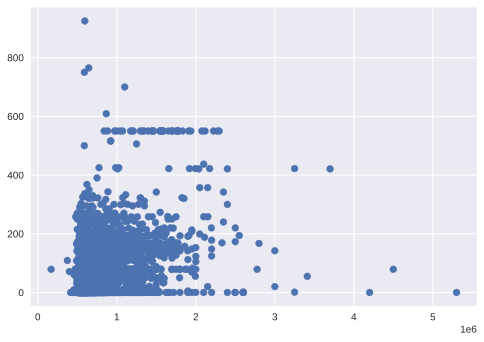

In [355]:
plt.scatter(data3["sold_price"],data3["HOA"]);

In [356]:
data3[["sold_price","HOA"]].corr()

,sold_price,HOA
sold_price,1.000000,0.310891
HOA,0.310891,1.000000
